# Multiple Linear Regression
## BoomBikes Bike Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free
Essentially, the company wants —
- To identify the variables affecting count of users, e.g. holiday, wind speed, season, etc.
- To create a linear model that quantitatively relates count of users with variables such as whether its a holiday or not, week day or not, temperature of the day, season, etc.

We have to build a model that helps to identify the demand for shared bikes with the available independent variables



## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike dataset

In [1]:
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_bike = pd.read_csv("Bike.csv")

In [3]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_bike.shape


(730, 16)

In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Findings - 
As per dictionary , we have found that 
1. instant is index record, so we can drop this
2. dteday is date, we already have month and year column, so we can drop this
3. cnt variable is sum of casual and registered user, so we can drop these columns 

In [7]:
bike_data = df_bike.drop(columns=['instant','casual', 'registered', 'dteday'])

## Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables


In [9]:
bike_data['season'] = bike_data['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

bike_data['yr'] = bike_data['yr'].map({0:'2018',1:'2019'})
bike_data['mnth'] = bike_data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike_data['holiday'] = bike_data['holiday'].map({0:'No',1:'Yes'})
bike_data['weekday'] = bike_data['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
bike_data['workingday'] = bike_data['workingday'].map({0:'No',1:'Yes'})

bike_data['weathersit'] = bike_data['weathersit'].map({1:"Good",2:'Moderate',3:'Bad',4:'Worse'})


bike_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No,Sun,No,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Mon,No,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Tues,Yes,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Wed,Yes,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Thurs,Yes,Good,9.305237,11.46350,43.6957,12.522300,1600


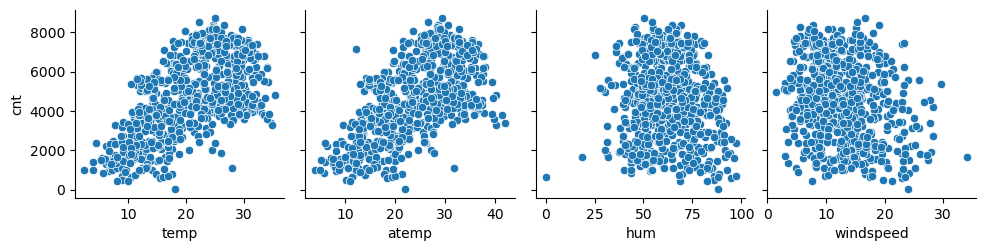

In [10]:
num_var=['temp','atemp','hum','windspeed']
sns.pairplot(bike_data,x_vars=num_var,y_vars='cnt',kind='scatter')
plt.show()

#### Visualising Categorical Variables

<Axes: xlabel='weathersit', ylabel='cnt'>

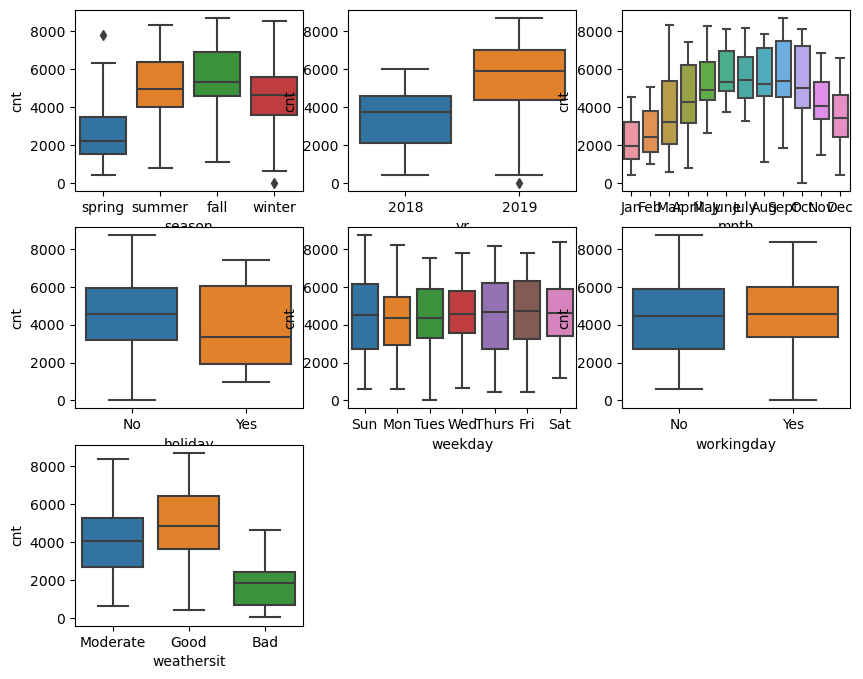

In [11]:

plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike_data)

plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bike_data)

plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_data)

plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bike_data)

plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_data)

plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_data)

plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike_data)


### Findings
1. We can see there is some linear relation coming of temp , atemp with count
2. Count of users is maximum when weather is 1 (clear and few clouds)
3. Count of users is more in year 2019 than 2018
4. Count of users not very much depends on weekdays, all days almost have similar box plotx
5. Count of users not much depends on working and non - working days


## Step 3: Data Preperation

In [12]:
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB



#### Creating dummies for 'season','mnth','weekday','weathersit'

In [13]:
cat_col=['season','yr','mnth','holiday','weekday','workingday','weathersit']
dummy = pd.get_dummies(bike_data[cat_col], drop_first=True,dtype='int')
dummy.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weathersit_Good,weathersit_Moderate
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [14]:
dummy.columns

Index(['season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'workingday_Yes',
       'weathersit_Good', 'weathersit_Moderate'],
      dtype='object')

In [15]:
# Combining both the dataframe, bike_data and of dummy variables

bike_data_new = pd.concat([bike_data,dummy], axis=1)
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weathersit_Good,weathersit_Moderate
0,spring,2018,Jan,No,Sun,No,Moderate,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,No,Mon,No,Moderate,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,0,0,0,1
2,spring,2018,Jan,No,Tues,Yes,Good,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,1,0
3,spring,2018,Jan,No,Wed,Yes,Good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,1,1,0
4,spring,2018,Jan,No,Thurs,Yes,Good,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,1,0


In [16]:
# dropping columns from which dummy varibles were created

bike_data_new.drop(cat_col, axis=1, inplace = True)

In [17]:
bike_data_new.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weathersit_Good,weathersit_Moderate
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


## Step 4: Train Test Data Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_data_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.head()


,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weathersit_Good,weathersit_Moderate
653,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0
576,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
426,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
482,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
df_test.shape

(219, 30)

### Rescaling the Features 

We will use MinMax scaling.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weathersit_Good,weathersit_Moderate
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [24]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weathersit_Good,weathersit_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,...,0.025490,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.676471,0.627451,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,...,0.157763,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.468282,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

In [26]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 5: Building the model

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select =15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 13),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 10),
 ('workingday_Yes', True, 1),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Jan', 'mnth_July', 'mnth_Sept',
       'holiday_Yes', 'weekday_Sun', 'workingday_Yes', 'weathersit_Good',
       'weathersit_Moderate'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics
#### Model 1


In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [33]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [34]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [35]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.31e-191
Time:                        13:39:59   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0023    

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,25.64
0,temp,22.83
13,weathersit_Good,14.85
14,weathersit_Moderate,9.02
3,season_spring,5.69
12,workingday_Yes,5.42
2,windspeed,4.68
5,season_winter,4.14
4,season_summer,3.20
6,yr_2019,2.10


#### Model 2 - removing hum bcoz of high VIF value

In [37]:
X_train_mod2 = X_train_rfe.drop(["hum"], axis = 1)  #Rebuilding the model without `hum`
X_train_mod2 = sm.add_constant(X_train_mod2)
lm2 = sm.OLS(y_train,X_train_mod2).fit()   # Running the linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          7.33e-189
Time:                        13:39:59   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1181    

In [38]:
# Calculate the VIFs for the new model
X_train_mod2 = X_train_mod2.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_mod2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_Good,14.84
0,temp,13.95
13,weathersit_Moderate,8.43
11,workingday_Yes,5.34
1,windspeed,4.67
2,season_spring,4.48
3,season_summer,2.77
4,season_winter,2.76
5,yr_2019,2.08
10,weekday_Sun,1.99


#### Model 3 - removing weathersit_Good bcoz of high VIF

In [39]:
X_train_mod3 = X_train_mod2.drop(["weathersit_Good"], axis = 1)  #Rebuilding the model without `hum`
X_train_mod3 = sm.add_constant(X_train_mod3)
lm2 = sm.OLS(y_train,X_train_mod3).fit()   # Running the linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.51e-162
Time:                        13:39:59   Log-Likelihood:                 445.79
No. Observations:                 510   AIC:                            -863.6
Df Residuals:                     496   BIC:                            -804.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1650    

In [40]:
X_train_mod3 = X_train_mod3.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_mod3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.06
11,workingday_Yes,5.22
1,windspeed,4.62
2,season_spring,3.07
3,season_summer,2.33
5,yr_2019,2.07
4,season_winter,1.97
10,weekday_Sun,1.96
6,mnth_Jan,1.62
7,mnth_July,1.59


#### Model 4 - removing holiday_Yes             bcoz of high VIF

In [41]:
X_train_mod4 = X_train_mod3.drop(["holiday_Yes"], axis = 1)  #Rebuilding the model without `hum`
X_train_mod4 = sm.add_constant(X_train_mod4)
lm4 = sm.OLS(y_train,X_train_mod4).fit()   # Running the linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.91e-163
Time:                        13:39:59   Log-Likelihood:                 444.53
No. Observations:                 510   AIC:                            -863.1
Df Residuals:                     497   BIC:                            -808.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1581    

In [42]:
X_train_mod4 = X_train_mod4.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_mod4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.81
10,workingday_Yes,4.66
1,windspeed,4.60
2,season_spring,2.99
3,season_summer,2.31
5,yr_2019,2.07
4,season_winter,1.91
9,weekday_Sun,1.83
6,mnth_Jan,1.62
7,mnth_July,1.59


#### Model 5 - removing mnth_Jan bcoz of high p value 

In [43]:
X_train_mod5 = X_train_mod4.drop(["mnth_Jan"], axis = 1)  #Rebuilding the model without `temp`
X_train_mod5 = sm.add_constant(X_train_mod5)
lm2 = sm.OLS(y_train,X_train_mod5).fit()   # Running the linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.25e-163
Time:                        13:39:59   Log-Likelihood:                 443.02
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     498   BIC:                            -811.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1439    

In [44]:
#X_train_mod5 = X_train_mod5.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_mod5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.71
3,season_spring,4.95
1,temp,3.38
5,season_winter,3.35
4,season_summer,2.59
10,workingday_Yes,1.64
9,weekday_Sun,1.63
7,mnth_July,1.48
8,mnth_Sept,1.28
2,windspeed,1.08


#### Model 7 - removing mnth_July bcoz of high p value

In [45]:
X_train_mod7 = X_train_mod5.drop(["mnth_July"], axis = 1)  #Rebuilding the model without `temp`
X_train_lm7 = sm.add_constant(X_train_mod7)
lm7 = sm.OLS(y_train,X_train_lm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.96e-163
Time:                        13:39:59   Log-Likelihood:                 439.83
No. Observations:                 510   AIC:                            -857.7
Df Residuals:                     499   BIC:                            -811.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1345    

In [46]:

X_train_mod7 = X_train_mod7.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_mod7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,temp,5.47
8,workingday_Yes,4.63
1,windspeed,4.58
2,season_spring,2.30
5,yr_2019,2.06
3,season_summer,1.98
7,weekday_Sun,1.82
4,season_winter,1.75
9,weathersit_Moderate,1.53
6,mnth_Sept,1.22


## Step 6: Residual Analysis of the train data


In [47]:
y_train_cnt = lm7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

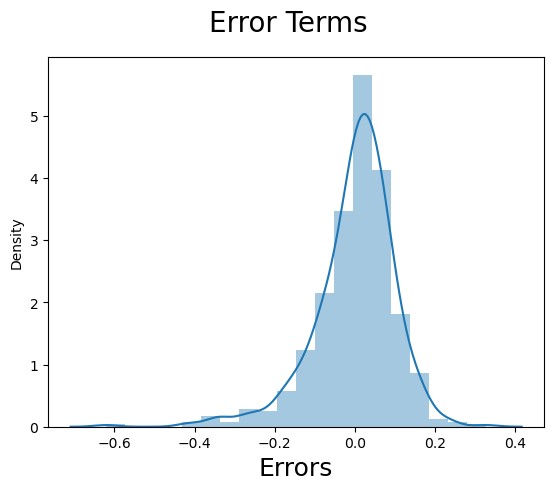

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Step 8: Making Predictions Using the Final Model


#### Applying the scaling on the test sets

In [49]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [50]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weathersit_Good,weathersit_Moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,...,0.036530,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.698630,0.652968,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,...,0.188034,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.459904,0.477117,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [51]:
y_test = df_test.pop('cnt')
X_test = df_test

In [52]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [53]:
# Creating X_test_new dataframe by dropping variables from X_test_m4

X_test_new = X_test_new.drop(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_June', 'mnth_Mar',
'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat',
'weekday_Thurs', 'weekday_Tues', 'weekday_Wed','mnth_Jan','hum','weathersit_Good','holiday_Yes','mnth_July'], axis = 1)

In [54]:
y_pred = lm7.predict(X_test_new)

## Step 8: Model Evaluation


In [55]:
residuals = y_test - y_pred

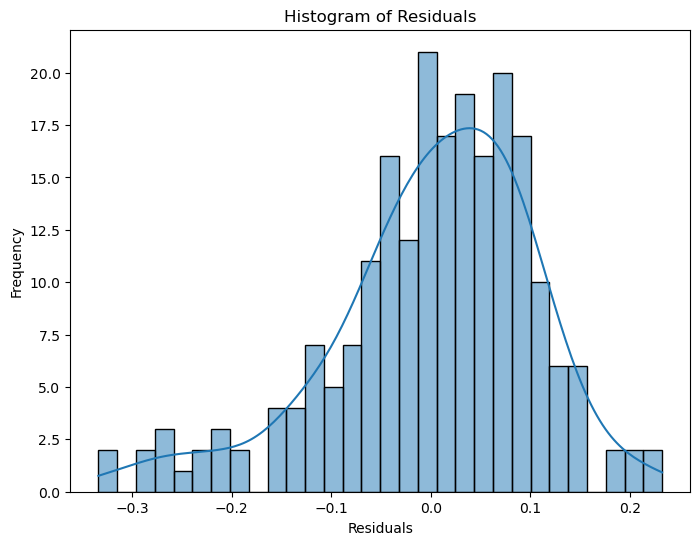

In [56]:
# Histogram of error terms

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'y_pred')

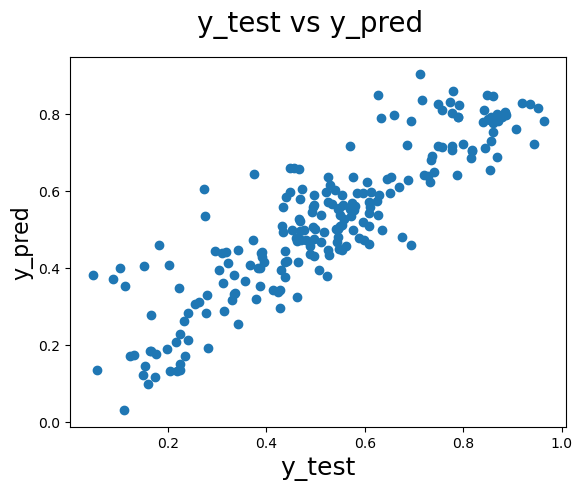

In [57]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

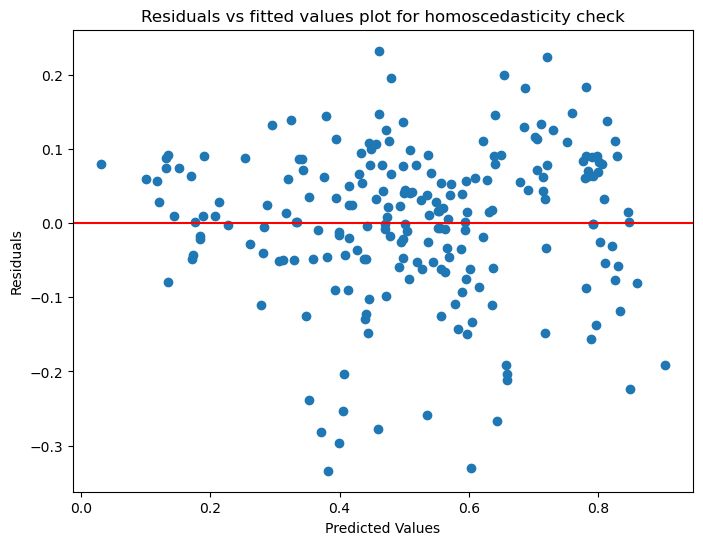

In [58]:
# Analysis of Residuals
# Checking for patterns in error terms

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.title("Residuals vs fitted values plot for homoscedasticity check")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [59]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_cnt)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 77.72
Train data r^2 : 79.27


In [60]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_mod7.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_mod7.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 74.3
Train data adjusted r^2 : 78.86


### FINAL RESULT COMPARISON:
Test data r^2 : 77.72

Train data r^2 : 79.27

Adjusted Test Data r^2 : 74.3

Adjusted Train Data r^2 : 78.86

As per our final Model, the below predictor variables influences bike booking :

1. Temperature
2. Wind speed
3. Season - Spring,Summer and Winter
4. Year - 2019
5. Weekday - Sunday
6. Moderate Weather
7. September Month
